<a href="https://colab.research.google.com/github/hanna-joo/project/blob/master/Consumption_Trends_2020/EDA/0928_samsungcard_ages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. 준비하기

In [ ]:
# 한글 파일 설정
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
# 런타임 다시 시작하기

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf


In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (30, 20)
register_matplotlib_converters()
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

Text(0.3, 0.3, '한글')

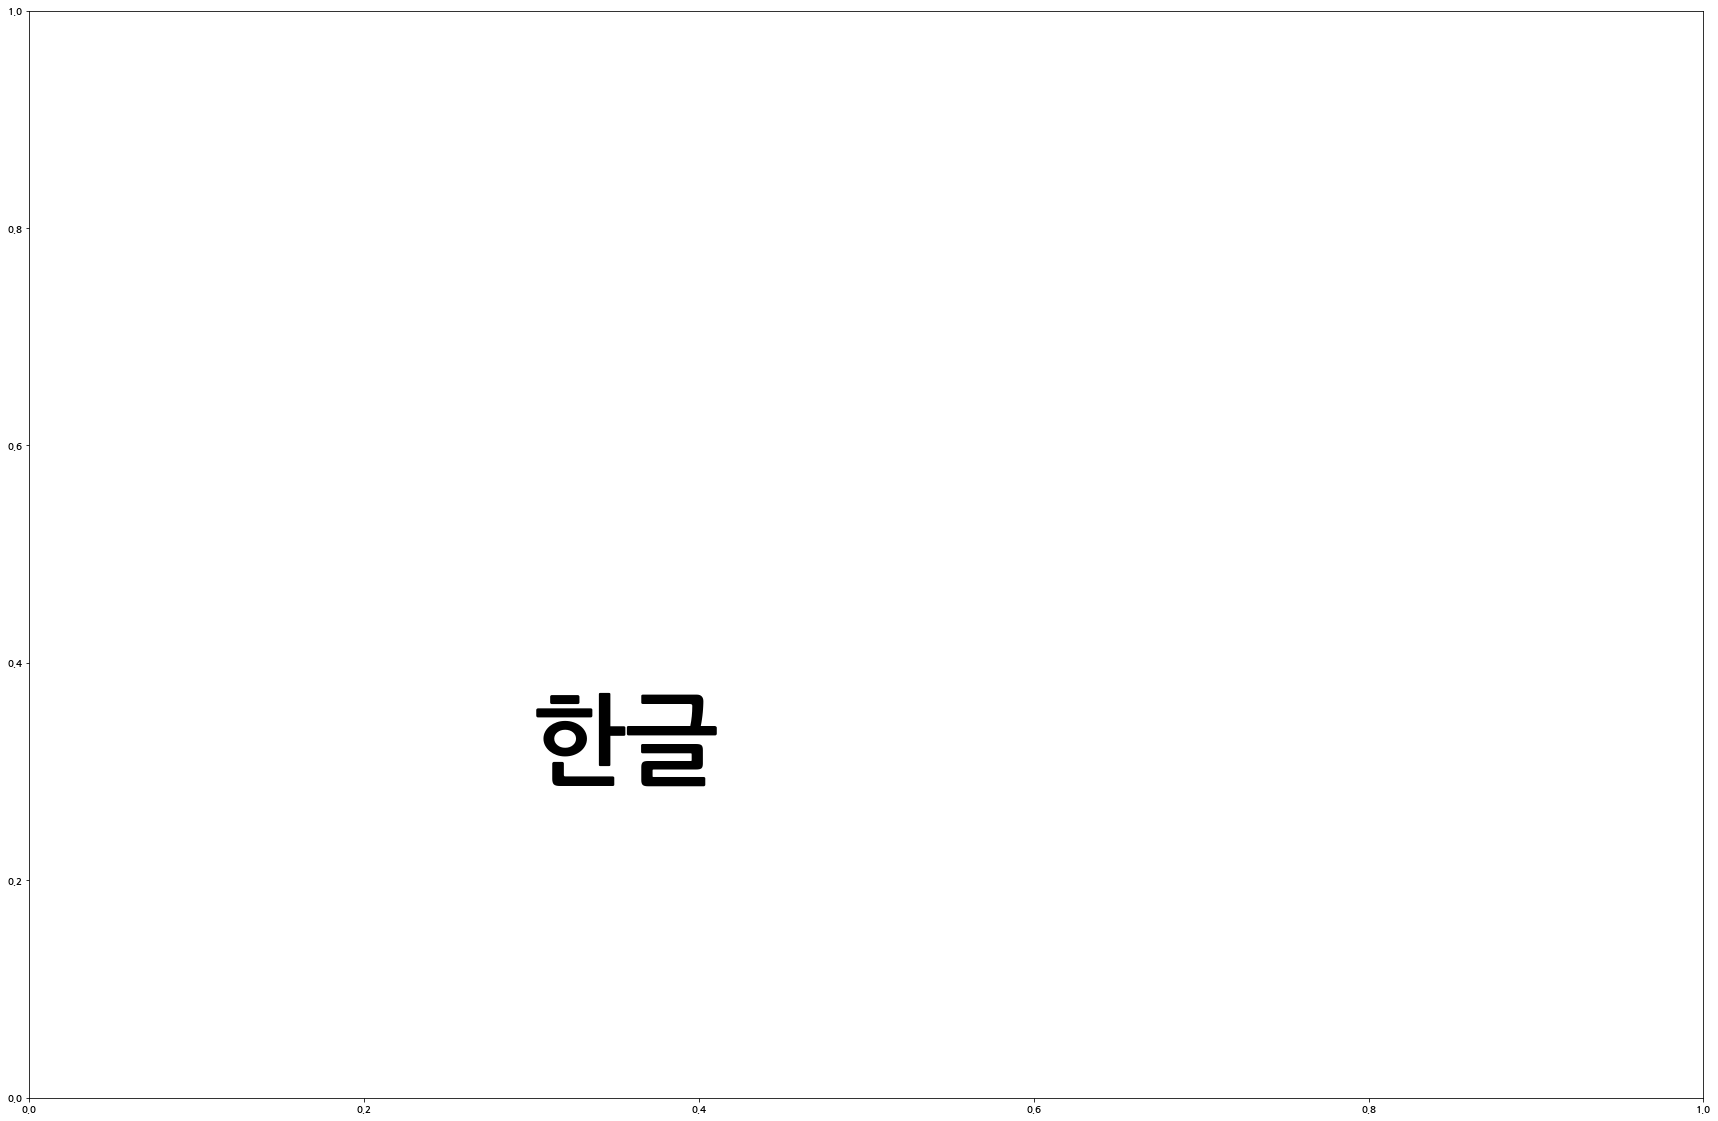

In [ ]:
font = {'family' : 'NanumGothic',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.text(0.3, 0.3, '한글', size=100)

In [ ]:
# 구글 드라이브 연동
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)       
          # print content of ROOT (Optional)
drive.mount(ROOT, force_remount=True)

/content/drive
Mounted at /content/drive


In [ ]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = '/content/drive/My Drive/Colab Notebooks/04_kdx/data_in'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

%cd "{PROJECT_PATH}"
%ls

/content/drive/My Drive/Colab Notebooks/04_kdx/data_in
center_GIN00010M.json  Mcorporation/               Samsungcard.xlsx
GIN00008A.csv          Mcorporation.zip            Shinhancard.xlsx
GIN00009A.csv          mk_news_201901_202006.xlsx
KDX_contest_2020.zip   Samsungcard.csv


## 1. 데이터 불러오기
- 분기별로 나누기

In [ ]:
sc.연령대.value_counts()

50대    15316
40대    15316
60대    15316
30대    15316
20대    15316
Name: 연령대, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sc = pd.read_csv('Samsungcard.csv', encoding='CP949')
sc.head(), sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76580 entries, 0 to 76579
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   소비일자    76580 non-null  int64 
 1   소비업종    76580 non-null  object
 2   성별      76580 non-null  object
 3   연령대     76580 non-null  object
 4   소비건수    76580 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.9+ MB


(       소비일자   소비업종  성별  연령대   소비건수
 0  20190101  가전/가구  남성  20대   5529
 1  20190101  가전/가구  남성  30대  17536
 2  20190101  가전/가구  남성  40대  22838
 3  20190101  가전/가구  남성  50대  15801
 4  20190101  가전/가구  남성  60대   6772, None)

In [ ]:
sc['연도분기'] = 0
for i, x in enumerate(sc.소비일자):
  if 20190101<= x <=20190630:
    sc['연도분기'][i] = str(x)[:4] + '-' + '1'
  elif 20190701<= x <=20191231:
    sc['연도분기'][i] = str(x)[:4] + '-' + '2'
  else:
    sc['연도분기'][i] = str(x)[:4] + '-' + '1'
sc.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.

,소비일자,소비업종,성별,연령대,소비건수,연도,연도분기
76575,20200630,할인점/마트,여성,20대,142108,2020,2020-1
76576,20200630,할인점/마트,여성,30대,388196,2020,2020-1
76577,20200630,할인점/마트,여성,40대,593836,2020,2020-1
76578,20200630,할인점/마트,여성,50대,552912,2020,2020-1
76579,20200630,할인점/마트,여성,60대,339458,2020,2020-1


In [ ]:
df2019 = sc[sc['연도']==2019]
df2020 = sc[sc['연도']==2020]

In [ ]:
sc19_1 = sc[sc['연도분기'].isin(['2019-1'])]
sc20_1 = sc[sc['연도분기'].isin(['2020-1'])]
sc_1 = pd.concat((sc19_1, sc20_1), axis=0)
sc_1.tail()

,소비일자,소비업종,성별,연령대,소비건수,연도,연도분기
76575,20200630,할인점/마트,여성,20대,142108,2020,2020-1
76576,20200630,할인점/마트,여성,30대,388196,2020,2020-1
76577,20200630,할인점/마트,여성,40대,593836,2020,2020-1
76578,20200630,할인점/마트,여성,50대,552912,2020,2020-1
76579,20200630,할인점/마트,여성,60대,339458,2020,2020-1


In [ ]:
categories = ['편의점','백화점/상품권/아울렛','패션/잡화','할인점/마트']
df_shopping = pd.DataFrame()
for i in categories:
  new_df = sc[sc.소비업종==i]
  df_shopping = pd.concat((df_shopping, new_df),axis=0)
df_shopping.head()

,소비일자,소비업종,성별,연령대,소비건수,연도
120,20190101,편의점,남성,20대,304185,2019
121,20190101,편의점,남성,30대,486465,2019
122,20190101,편의점,남성,40대,385529,2019
123,20190101,편의점,남성,50대,189146,2019
124,20190101,편의점,남성,60대,48643,2019
...,...,...,...,...,...,...
76575,20200630,할인점/마트,여성,20대,142108,2020
76576,20200630,할인점/마트,여성,30대,388196,2020
76577,20200630,할인점/마트,여성,40대,593836,2020
76578,20200630,할인점/마트,여성,50대,552912,2020


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


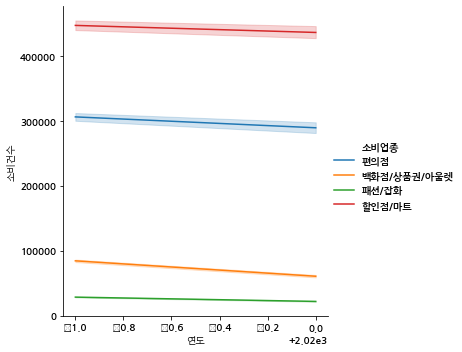

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"]=(12,2)
category = [['편의점','할인점/마트','백화점/상품권/아울렛']]
sns.relplot(x='연도', y='소비건수', hue='소비업종', kind='line', data=df_shopping)

## 3. 연령대별 파악하기

- 전체 소비건수 연령대별 파악하기
  + 30, 40대의 소비건수 전반적으로 감소

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


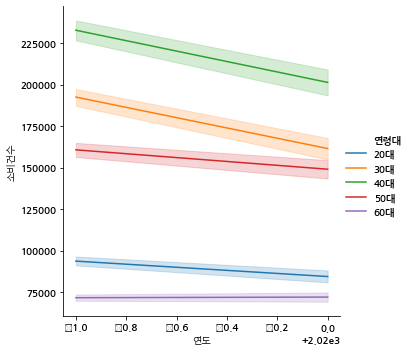

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"]=(12,2)

sns.relplot(x='연도', y='소비건수', hue='연령대', kind='line', data=sc)

In [ ]:
def categorical_sum(df=sc, category='미용'):
  category_df = sc_1[sc_1.소비업종 == category]
  category_df['연도'] = category_df['연도'].astype('str')
  # category_df['연도'] = [x[:6] for x in category_df['소비일자']]
  new_df = pd.DataFrame(category_df[['연도분기','연령대','소비건수']].groupby(['연도분기','연령대'])['소비건수'].sum())
  new_df.reset_index(inplace=True)
  plt.rcParams["figure.figsize"] = (20,5)
  sns.barplot(data=new_df,x="연령대", y="소비건수",hue="연도분기")
  plt.xticks(rotation=45)
  return plt.show()

- 작년대비 연령대별 소비건수(카테고리별)
  + 30, 40대는 거의 모든 카테고리에서 소비 감소
  + `가정생활/서비스`, `교육/학원`, `미용`, `백화점/상품권/아울렛`, `스포츠/문화/레저`, `여행/교통` 모든 연령대에서 소비 감소
  + 오프라인 소비건수라서 아무래도 모든 카테고리에서 감소추세를 보임

가전/가구


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


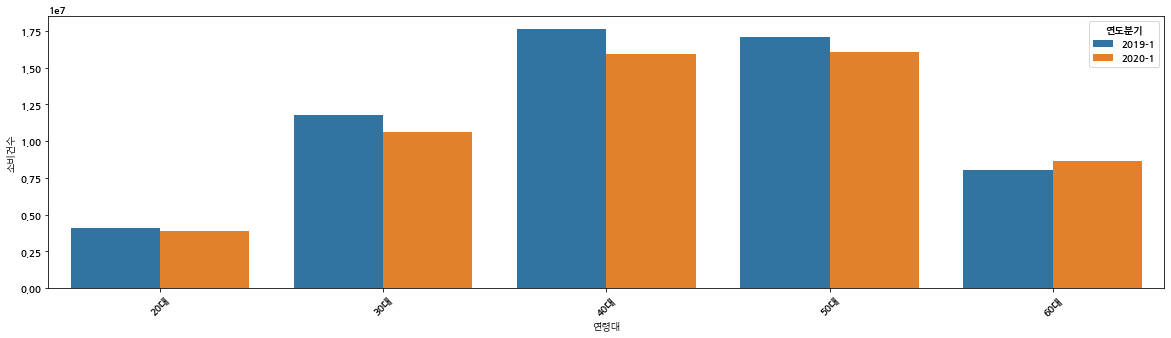

******************************
가정생활/서비스


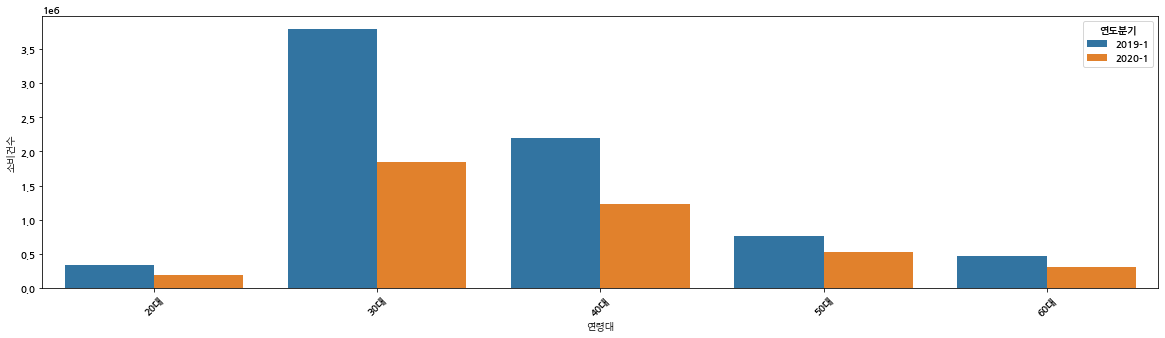

******************************
교육/학원


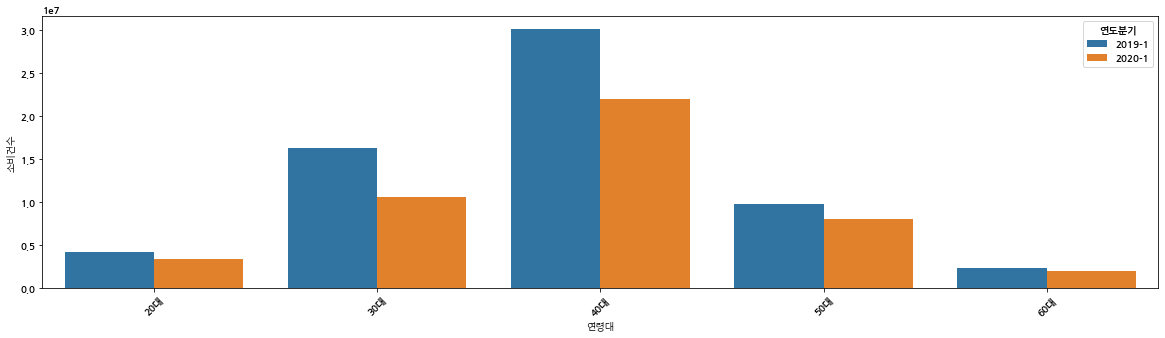

******************************
미용


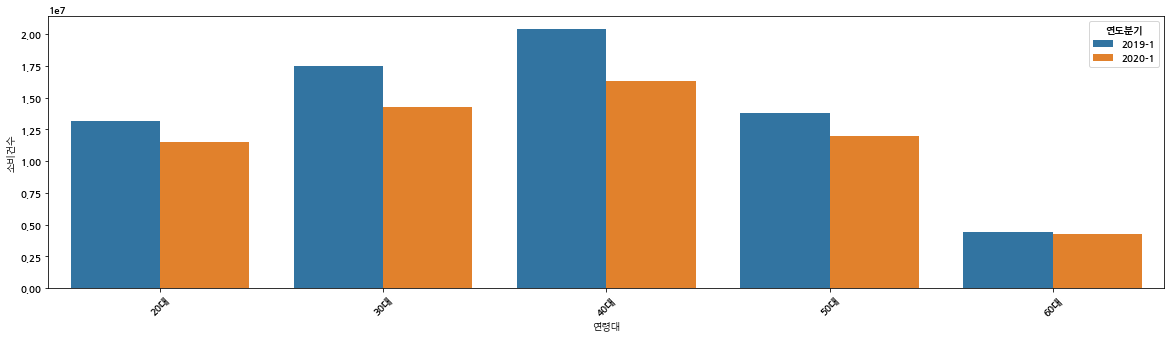

******************************
백화점/상품권/아울렛


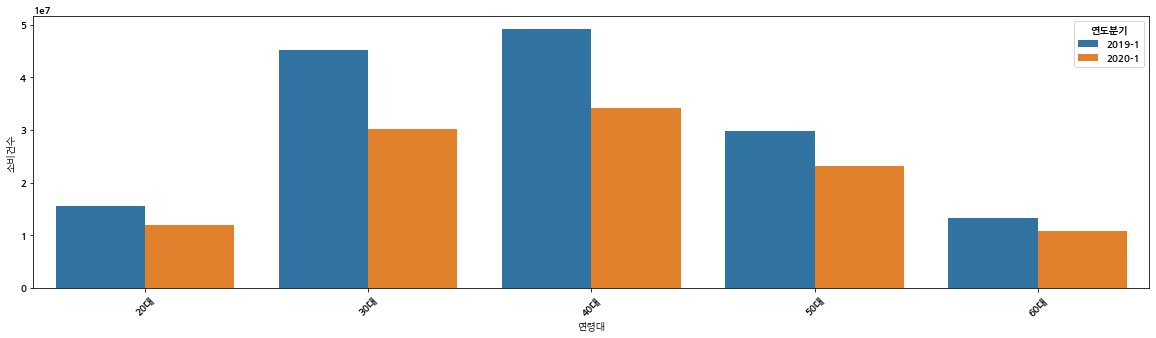

******************************
스포츠/문화/레저


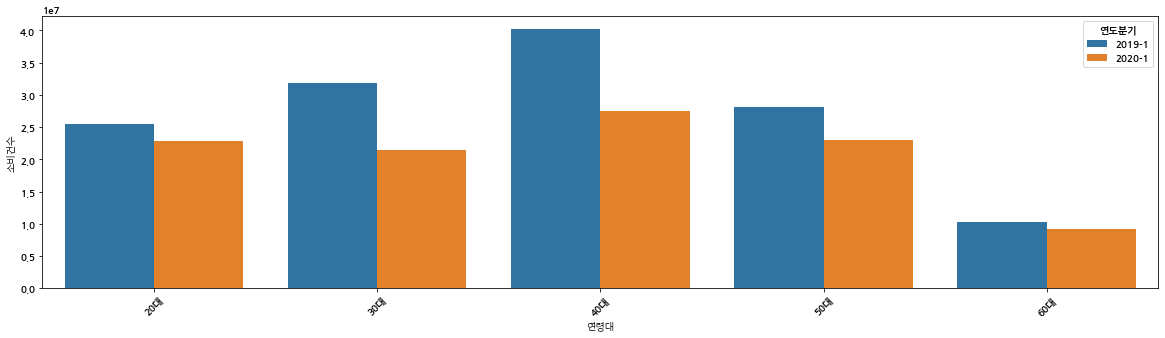

******************************
여행/교통


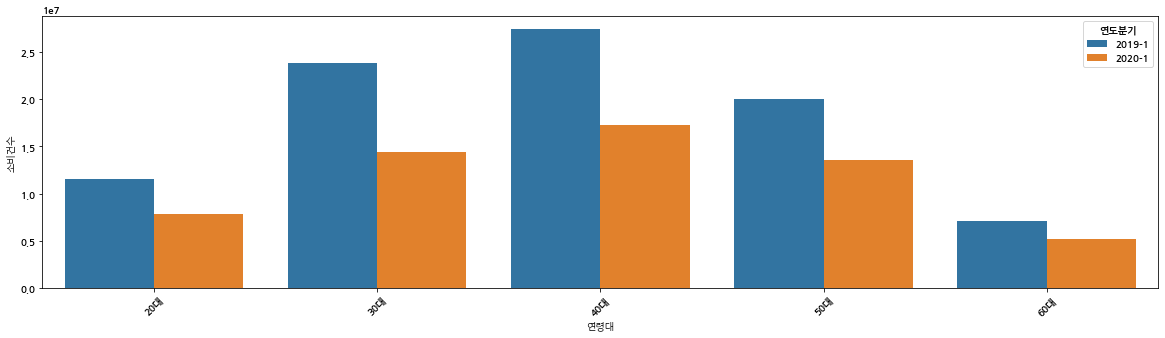

******************************
요식/유흥


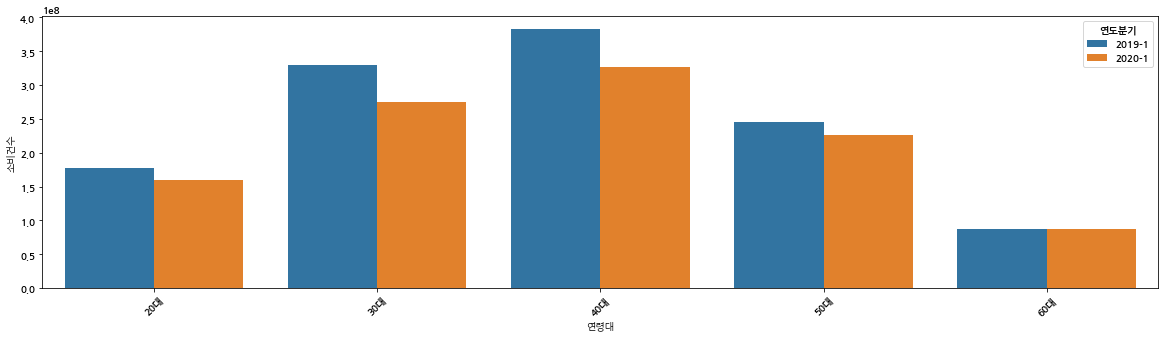

******************************
의료


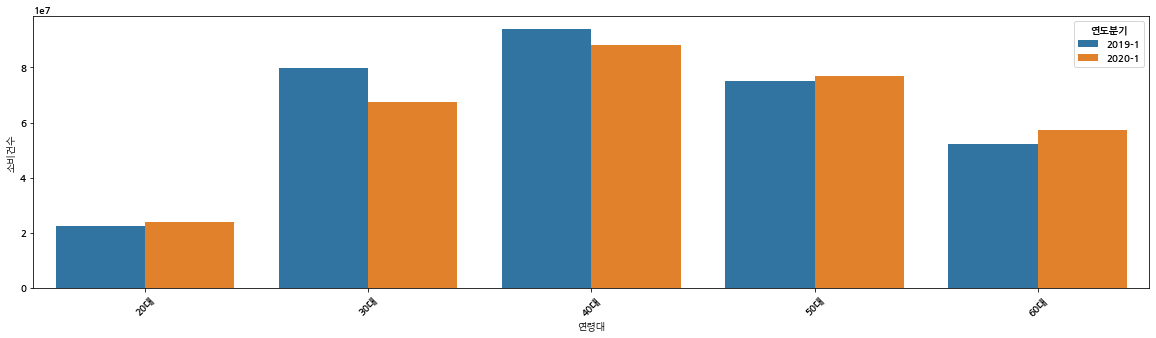

******************************
자동차


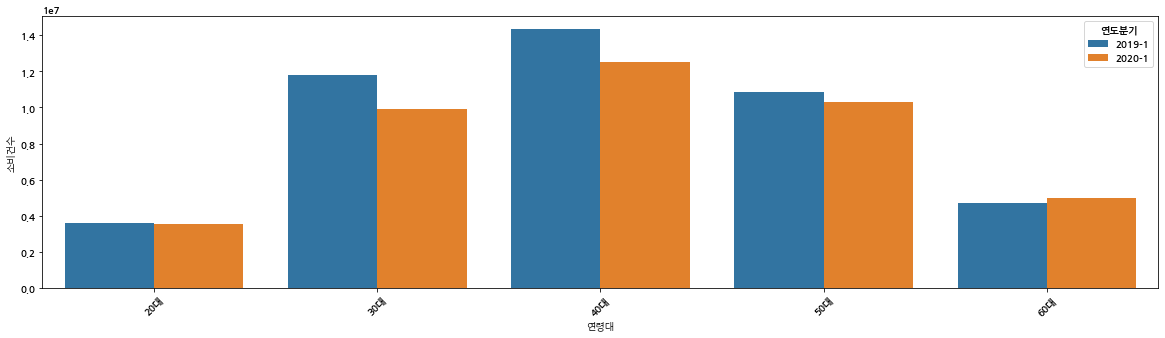

******************************
주유


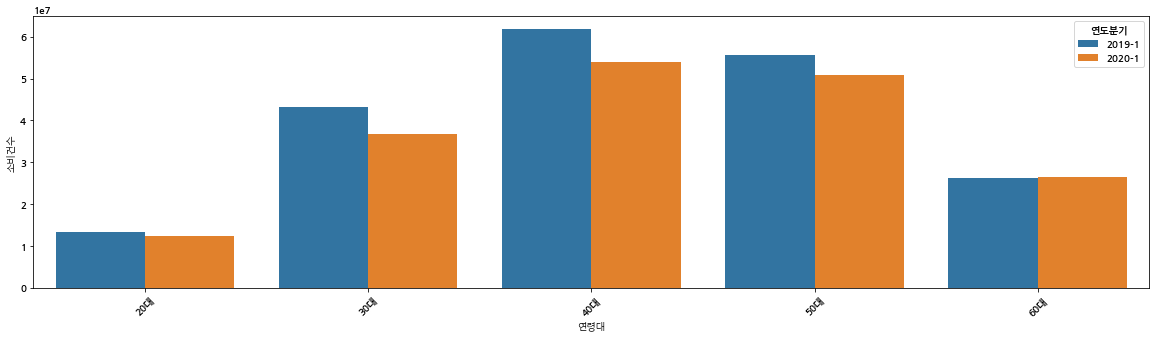

******************************
패션/잡화


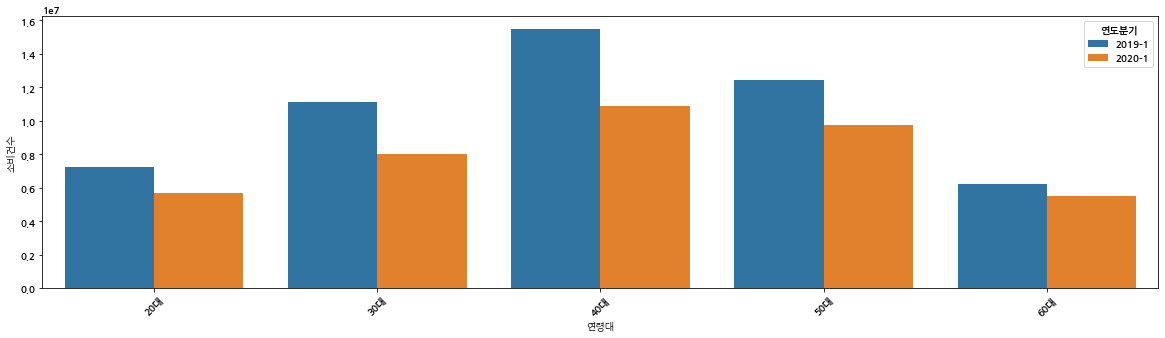

******************************
편의점


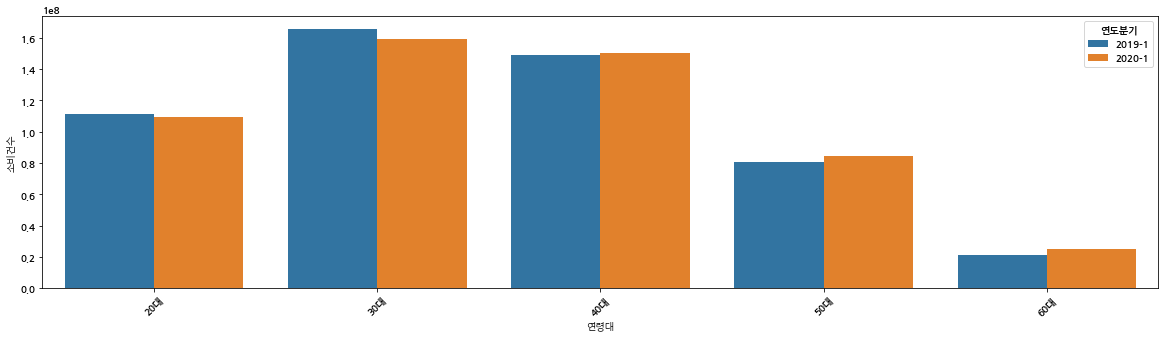

******************************
할인점/마트


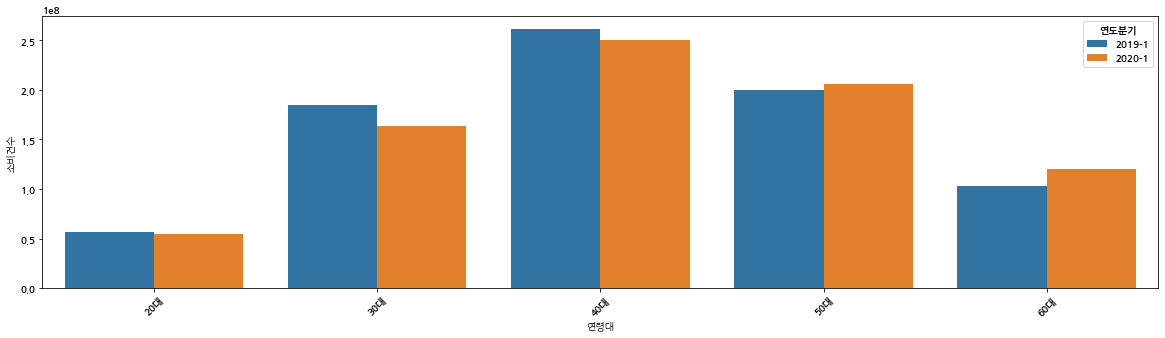

******************************


In [ ]:
for i in list(sc['소비업종'].unique()):
  print(i)
  categorical_sum(sc, i)
  print("*"*30)